
# Machine Learning 2019/2020 - Challenge 2 - 16 December 2019

## Rules (read carefully):
- This year the results of the two challenges will count 10% and 15% respectively of your final score.
- If you work with a group of colleges (max 3 students), please remember your solution must be <b>"your solution"</b>, hence provide your individual answers/arguments/opinions/critics;
- Students of the same group can share <b>ONLY</b> the code.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it before the 1:59 PM of the 19 December 2019 (Rome Berlin time);
- The subject of your email must be: "[Challenge_2_solution] NAME - SURNAME - MATRICOLA."
- Double check the subject of your email and the attachments;
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b>;
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>
- The physical attendance to the lab is not mandatory, you can work from a remote place by following the identical rules.
- Your solution might be considered as the "copy" of others solutions, in that specific case the assigned score will be the result of the proposed solution divided by the number of "too much similar" solutions. If you share the code with the components of your "group" please comment the code and answer the questions by yourself.

- Monday 16 December, I will share the necessary key to unzip the content of the provided challenge material (I will also send a message on the Google group).
- To unzip the content of the zip you will use the above key
- Then read carefully all the part of the jupyter notebook and fill all mandatory fields.
- <b>Don't write "personal" emails</b> to Stefano Faralli, but please <b>use the google group</b> I will reply until 12 AM of 17 December 2019 <b>(strict deadline)</b>. 
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b> hence, please use the provided corresponding "YOUR COMMENTS" cell</b> 



## Identification (Mandatory)

In [1]:
yourNameSurname = 'shadi andishmand'
yourMatricolaNumber = '1919010'
yourStudentEMAIL = 'andishmand.1919010@studenti.uniroma1.it'
yourColleguesNameSurnames=['paolo mazza']

# Lego Bricks Visual Classification
<img src="45020_Prod_03.jpg"/>

## Description of the task:
<br>
devolop a classifier able to classify with a <b>weighted avg F1 score greater than 0.60</b> pictures of Lego bricks taken at different angles.
Use Keras and scikit-learn to develop, train and evaluate a CNN with:<br>
- Convolutional and Pooling operations<br>  
- a dense sub network at the end <br>


## Part 1 -  Dataset (max 6/30)

### Part 1-a  - Load the dataset (3/6 pts)
The provided dataset is composed by pictures of Lego bricks, taken at different angles:<br>
As an example the following picture:<br>
<img src="dataset/train/2357 Brick corner 1x2x2/201706171206-0001.png"/> 
corresponds to the png file in "dataset/train/2357 Brick corner 1x2x2/201706171206-0001.png"
- "201706171206-0001.png" is the name of the file;
- "2357 Brick corner 1x2x2" is the label of the Lego brick type;
- "train" means that this is the portion of the dataset you must use for the training
Inside the folder <b>dataset</b> you can find another subfolder <b>validatetest</b>.
The content inside of <b>validatetest</b> must be used (after a proper split) for validation during training and for testing during the evaluation.


Load the dataset and create: 
- X_train, y_train from the content in "dataset/train/"
- X_validate,y_validate,X_test,y_test as a split (20% for validation and 80% for test) of the content in "dataset/validatetest/"

<b>Tips:</b>
- you can use CV2 or matplotlib to load pictures
- check the file you are loading is ending with ".png"


In [36]:

import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split


In [37]:
def loadPictures(path):
  for _,dirs,_ in os.walk(path):
    X = []
    y = []
    for dir in dirs:
        for _,_,files in os.walk(path+dir+"/"):
            for file in files:
                if file.find('.png')<0:
                       continue     
                img = cv2.imread(path+dir+"/"+file)
                X.append(img)
                y.append(dir)
    return X, y

In [38]:
X_train, y_train = loadPictures('dataset/train/')

In [39]:
X, y = loadPictures('dataset/validationandtest/')

# your comments: 


# part 1-a - load data set
in this part there is 4 blocks of code.
in the first part the useful libraries is imporetd:
first library is matplotlib which is used for heatmap plot in the 4th part.this library is useful for plotting 2D , os for directory cv2 for image reading and sklearn.model_selection for spliting dataset into two part.

in the second block LOADPICTURE function is defined to give hte images directory.in that os which is used for walk function which is a function that creates a tuple of values (current_path, directories in current_path, files in current_path) which here we just need dirs in first for then in second for we go into files and try to find all imges with png extension.
then we use imread from opencv library which load image from a specific file.in this function we pass the (path) to it and then we use this to load our data set.
then we call this function to load images into RAM and use them for training and evaluating.the final folder contain labeles and pictures 


### Part 1-b Dataset  preprocessing (3/6 pts max)
Since you are using the dataset for a classification task using Keras API you will need to perform some dataset tranformations:<br>
1) tranform all the images into grayscale having a final shape of (dim,dim,1)  dim<200;<br>
<img src="info.png">
2) encode properly the target features for train, test and validation<br>

<b>Tips:</b>
- you can use CV2 and numpy to tranform and reshape the pictures


# part1-b data preprocessing
in this part we did preprocessing the data which is really important before feeding it into our model.i did preprocessing before spliting my dataset to train and test to avoid doing a similiar work again. 

first block import pandas library for using get dummies and then numpy for some functions like reshape in first block.we load train and test dataset in 3 dimensions.if we had really big data set we should try another ways to load data set and i tried first another way to load data step by step in memory by generator but it was slow in my pc so i changed it to this way since the data set was small.

second and third block do similar things for train dataset and test dataset: 
we do resizing with a specific scale ( i use this scale since with smaller sacle the picture is getting fade and resouloution and edges of images decrease and it get worse for CNN to classify legoes corectly) and making small each image and then we change the image to gray by using "resize and cvtcolor" from opencv .as you know colorful images have 3 channel RGB which with converting them to gray we reduced it to 1 channel.After convert to gray we use the minmax scaling to have pixel values in range [0,1].

in 4th block i reshaped the dataset and add 1dimension to it since we need 4 dimension for CNN.
in 5th block i used get_dummies function which help me to make one feature for each different values that i have in target function and we need it since we wanted to use softmax in the output layer and output is 16 values array and in this way we have a 16 values array that one of them is 1 that it is the predicted class so with get dummies i transformed it to modify my categories as i want.

in last part i splited data to test and train which i specified 80% is for test and train 20% is automatcally chose by python. since the train and test set have overlap its ok to do this.

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [41]:
X_train_t = []
scale=0.6
for img in X_train:
    img_resize = cv2.resize(img, (0, 0), fx=scale, fy=scale)
    gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
    X_train_t.append(gray)
X_train = X_train_t

In [42]:
X_t = []
for img in X:
    img_resize = cv2.resize(img, (0, 0), fx=scale, fy=scale)    
    gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
    X_t.append(gray)
X = X_t

In [43]:
#4-block
width = X_train[0].shape[0]
height = X_train[0].shape[1]
X_train = np.asarray(X_train).astype('float32') / 255.
X = np.asarray(X).astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), width, height, 1))  
X = np.reshape(X, (len(X), width, height, 1))  

In [44]:
#5th block
y_train = pd.get_dummies(y_train)

In [45]:
y = pd.get_dummies(y)

In [46]:
X_validate, X_test, y_validate, y_test = train_test_split(X, y, test_size=0.8)

# your comments:

## Part 2 - Training (max 12 pts)
## Part 2.a - create and train a  working CNN (10/10 pts)
use Keras: with Convolutional and Pooling operations and a dense sub network at the end, use properly the preprocessed portions of the dataset (train and validation) and apply scaling.

## Part 2.b -  save the learned model (2/10 pts)
save the model to a file

In [48]:
#code for Part 2 - Training
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Dense, Flatten
from keras.models import Model
from keras.callbacks import TensorBoard

In [49]:
input_img = Input(shape=(width, height, 1)) 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(16, activation='softmax')(x)
model = Model(input_img, x)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 120, 120, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 120, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                115216    
Total para

In [51]:
model.fit(x=X_train, y=y_train,
          epochs=20,
          batch_size=128,
          shuffle=True,
          validation_data=(X_validate, y_validate),
          callbacks=[TensorBoard(log_dir='/tmp/model', histogram_freq=0, write_graph=True)]
         )          

Train on 6379 samples, validate on 1275 samples
Epoch 1/20
6379/6379 [==============================] - 89s 14ms/step - loss: 1.7066 - acc: 0.4676 - val_loss: 0.8399 - val_acc: 0.6549
Epoch 2/20
6379/6379 [==============================] - 89s 14ms/step - loss: 0.6824 - acc: 0.7413 - val_loss: 0.6471 - val_acc: 0.7490
Epoch 3/20
6379/6379 [==============================] - 79s 12ms/step - loss: 0.5353 - acc: 0.8066 - val_loss: 0.4914 - val_acc: 0.8196
Epoch 4/20
6379/6379 [==============================] - 88s 14ms/step - loss: 0.4525 - acc: 0.8298 - val_loss: 0.4479 - val_acc: 0.8267
Epoch 5/20
6379/6379 [==============================] - 89s 14ms/step - loss: 0.3951 - acc: 0.8519 - val_loss: 0.3565 - val_acc: 0.8675
Epoch 6/20
6379/6379 [==============================] - 87s 14ms/step - loss: 0.3605 - acc: 0.8628 - val_loss: 0.3404 - val_acc: 0.8761
Epoch 7/20
6379/6379 [==============================] - 93s 15ms/step - loss: 0.3352 - acc: 0.8726 - val_loss: 0.3259 - val_acc: 0.8761


In [52]:
model.save('shadiandishmandmodel.h5')

# your comments:

# part 2
validation set was was a part of train set so we predict that the val_accuracy will be something near the 1. we tried many numbers of epoches so finally i decieded to put it 20 epoches which give me about 90% accuracy.

we put some of the hyperparameters like activation functions,batch_size,and etc of the network and made a CNN, with input layer to be appropriate for images and a dense layer with softmax at the output.


# Part 3 - Evaluation (max 10 pts)
## Part 3.a - Test (max 8/10 pts)
- use the classifier built during Part 2, to classify the lego brick label of each picture of your Test dataset portion.
- print the classifcation report

## Part 3.b - minal f1 requirement (max 2/10 pts)
- if from the report (in part 3.a) you printed, the weighted avg F1 is greater than 0.60 you get 1 point
- if from the report (in part 3.a) you printed, the weighted avg F1 is greater than 0.70 you get 1 point
- if from the report you printed in part 3.a the weighted avg F1 is less or equal to 0.60 you get -2 points

In [54]:
#code for  part 3
from keras.models import load_model
from sklearn.metrics import classification_report

In [55]:
model = load_model('shadiandishmandmodel.h5')
model = Model(inputs=model.input, outputs=model.output)

In [56]:
pred = model.predict(X_test)
l_pred = []
for p in pred:
    l_pred.append(np.argmax([int(round(x)) for x in p]))

In [57]:
y_test_l = []
for p in np.asarray(y_test):
    y_test_l.append(np.argmax(p))

In [58]:
print(classification_report(y_test_l, l_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       324
           1       0.88      0.95      0.91       320
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       333
           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       324
           6       1.00      1.00      1.00       327
           7       0.83      0.91      0.87       319
           8       0.99      1.00      1.00       319
           9       1.00      0.99      1.00       310
          10       1.00      0.98      0.99       310
          11       1.00      1.00      1.00       310
          12       0.99      0.90      0.94       336
          13       1.00      1.00      1.00       313
          14       0.91      0.72      0.81       313
          15       1.00      1.00      1.00       313

    accuracy                           0.96      5104
   macro avg       0.96   

# your comments:

# part 3

i imported keras.models and sklearn.metrics to load model and make classification report.with classification report when i give it the correct target values and those how predicted by CNN it displays the precision, recall, F1, and support scores for the each class so as i predicted it give about 96 accuracy avg.

# Part 4 - Feature importance (max 2/30 pts)
## Part 4.a perform a pixel based feature importance analysis on the validation portion of the dataset (1 pts)
## Part 4.b plot the corresponding heatmap of pixel importance (1 pts)



In [60]:
# code for part 4 

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [62]:
n_jobs = 3
forest = ExtraTreesClassifier(n_estimators=1000,
                              n_jobs=n_jobs,
                              verbose=1,
                              criterion='entropy',
                              random_state=0)

X_validate = X_validate.reshape((len(X_validate), width*height))

In [63]:
forest.fit(X_validate, y_validate)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    6.9s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   13.8s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:   23.2s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:   28.6s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=3,
                     oob_score=False, random_state=0, verbose=1,
                     warm_start=False)

In [64]:
importances = forest.feature_importances_
importances = importances.reshape((width, height))

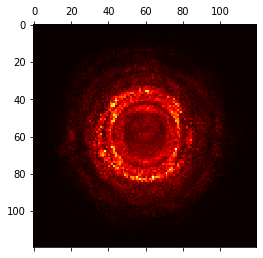

In [65]:
plt.matshow(importances, cmap=plt.cm.hot)
plt.show()

# your comments:

# part 4
feature importance provides a score that indicates how each feature was valueable in the construction of the boosted decision trees
within my model.The more an attribute is used to make key decisions in decision trees, the higher its relative importance so this informations gain from
each pixel in my model after fit it. the higher information give us brighter resoloution in that pixels in the feature importance image.

The heat map that we get is not very good.it is black at the borders.The images are almost are all in grayscale, so we get that the center is darker that than the circles around it because the defining edges are spread around it. 

# Part 5 - Extra point
- if from the report you printed in part 3.a the weighted avg F1 is greater tha 0.85 you get 1 point



<img src="dexter.jpg"/>